In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np
import pickle
import pandas as pd

In [4]:
with open('data/credit.pkl', 'rb') as f:
    X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = pickle.load(f)

In [5]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [8]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
X_credit.shape

(2000, 3)

In [9]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [10]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [11]:
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

Árvore de Decisão

In [12]:
parametros = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10]}

In [14]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.9835


Random Forest

In [15]:
parametros2 = {'criterion': ['gini', 'entropy'],
             'n_estimators': [10, 40, 100, 150],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10]}

In [17]:
grid_search2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros2)
grid_search2.fit(X_credit, y_credit)
melhores_parametros2 = grid_search2.best_params_
melhor_resultado2 = grid_search2.best_score_
print(melhores_parametros2)
print(melhor_resultado2)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9865


KNN

In [18]:
parametros3 = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [19]:
grid_search3 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros3)
grid_search3.fit(X_credit, y_credit)
melhores_parametros3 = grid_search3.best_params_
melhor_resultado3 = grid_search3.best_score_
print(melhores_parametros3)
print(melhor_resultado3)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


Regressão Logística

In [20]:
parametros4 = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver':['lbfgs', 'sag', 'saga']}

In [21]:
grid_search4 = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros4)
grid_search4.fit(X_credit, y_credit)
melhores_parametros4 = grid_search4.best_params_
melhor_resultado4 = grid_search4.best_score_
print(melhores_parametros4)
print(melhor_resultado4)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


SVM

In [22]:
parametros5 = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [23]:
grid_search5 = GridSearchCV(estimator=SVC(), param_grid=parametros5)
grid_search5.fit(X_credit, y_credit)
melhores_parametros5 = grid_search5.best_params_
melhor_resultado5 = grid_search5.best_score_
print(melhores_parametros5)
print(melhor_resultado5)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


Redes Neurais

In [24]:
parametros6 = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [25]:
grid_search6 = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros6)
grid_search6.fit(X_credit, y_credit)
melhores_parametros6 = grid_search6.best_params_
melhor_resultado6 = grid_search6.best_score_
print(melhores_parametros6)
print(melhor_resultado6)

C:\Users\natha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\neural_network\_multi

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9970000000000001


Validação Cruzada

In [26]:
from sklearn.model_selection import cross_val_score, KFold

In [38]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, splitter='random')
    scores = cross_val_score(arvore, X_credit, y_credit, cv=kfold)
    resultados_arvore.append(scores.mean())
    
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())
    
    knn = KNeighborsClassifier(n_neighbors=20, p=1)
    scores = cross_val_score(knn, X_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())
    
    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, X_credit, y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())
    
    svm = SVC(C=1.5, kernel='rbf', tol=0.001)
    scores = cross_val_score(svm, X_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())
    
    rede_neural = MLPClassifier(activation='relu', batch_size=10, solver='adam')
    scores = cross_val_score(rede_neural, X_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(scores.mean())
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [42]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random Forest': resultados_random_forest,
                          'KNN': resultados_knn, 'Logistica': resultados_logistica,
                          'SVM': resultados_svm, 'Rede Neural': resultados_rede_neural})
resultados

,Arvore,Random Forest,KNN,Logistica,SVM,Rede Neural
0,0.9790,0.9865,0.9800,0.9475,0.9835,0.9970
1,0.9830,0.9870,0.9800,0.9465,0.9840,0.9980
2,0.9760,0.9875,0.9800,0.9470,0.9835,0.9975
3,0.9790,0.9875,0.9800,0.9460,0.9845,0.9975
4,0.9840,0.9885,0.9810,0.9465,0.9855,0.9955
5,0.9785,0.9890,0.9785,0.9465,0.9835,0.9965
6,0.9825,0.9890,0.9800,0.9470,0.9840,0.9970
7,0.9755,0.9860,0.9805,0.9480,0.9845,0.9975
8,0.9775,0.9880,0.9810,0.9465,0.9820,0.9935
9,0.9795,0.9880,0.9810,0.9465,0.9830,0.9970


In [43]:
resultados.describe()

,Arvore,Random Forest,KNN,Logistica,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.977850,0.987367,0.980200,0.946950,0.983983,0.996617
std,0.002995,0.001581,0.001270,0.000687,0.001141,0.000935
min,0.973000,0.983500,0.977500,0.945500,0.982000,0.993500
25%,0.975625,0.986500,0.979625,0.946500,0.983500,0.996500
50%,0.978000,0.987500,0.980000,0.947000,0.984000,0.996500
75%,0.979875,0.988500,0.981000,0.947500,0.984500,0.997375
max,0.984000,0.990000,0.983500,0.948500,0.987000,0.998000


In [44]:
resultados.var()

Arvore           8.968103e-06
Random Forest    2.498851e-06
KNN              1.613793e-06
Logistica        4.715517e-07
SVM              1.301437e-06
Rede Neural      8.738506e-07
dtype: float64

In [45]:
(resultados.std() / resultados.mean() * 100)

Arvore           0.306251
Random Forest    0.160100
KNN              0.129601
Logistica        0.072517
SVM              0.115937
Rede Neural      0.093797
dtype: float64

Teste de normalidade nos resultados

In [46]:
alpha = 0.05

In [47]:
from scipy.stats import shapiro

In [48]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.973655641078949, pvalue=0.6432052254676819),
 ShapiroResult(statistic=0.9608489274978638, pvalue=0.32558712363243103),
 ShapiroResult(statistic=0.924409031867981, pvalue=0.03495445102453232),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.96373051404953, pvalue=0.384358674287796),
 ShapiroResult(statistic=0.891808807849884, pvalue=0.005326093640178442))

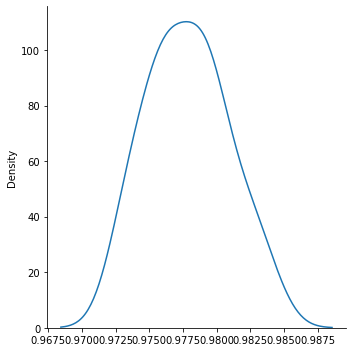

In [51]:
import seaborn as sns
sns.displot(resultados_arvore, kind='kde');

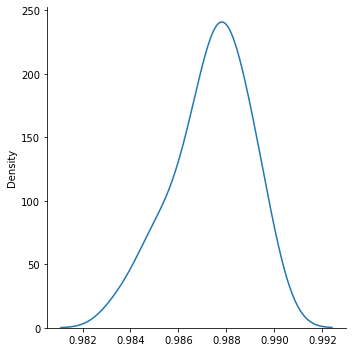

In [52]:
sns.displot(resultados_random_forest, kind='kde');

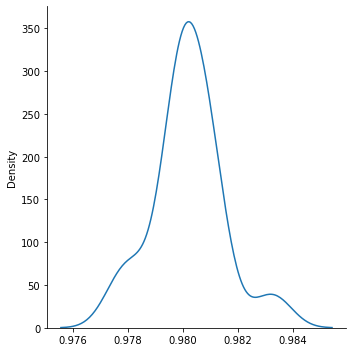

In [53]:
sns.displot(resultados_knn, kind='kde');

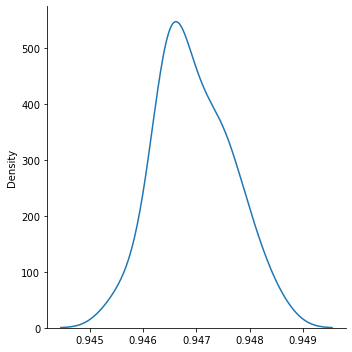

In [54]:
sns.displot(resultados_logistica, kind='kde');

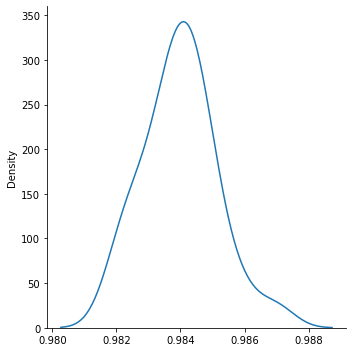

In [55]:
sns.displot(resultados_svm, kind='kde');

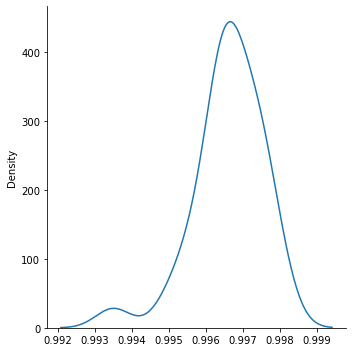

In [56]:
sns.displot(resultados_rede_neural, kind='kde');

Teste de hipótese com ANOVA e Tukey

In [57]:
from scipy.stats import f_oneway

In [62]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)

In [63]:
p

3.743885942024133e-170

In [64]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes.')
else:
    print('Hipótese alternativa rejeitada. Resultado são iguais.')

Hipótese nula rejeitada. Dados são diferentes.


In [65]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                        'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                        'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest',
                        'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn',
                        'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica',
                        'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm',
                        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']}

In [70]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9790,arvore
1,0.9830,arvore
2,0.9760,arvore
3,0.9790,arvore
4,0.9840,arvore
...,...,...
175,0.9950,rede_neural
176,0.9955,rede_neural
177,0.9960,rede_neural
178,0.9960,rede_neural


In [71]:
from statsmodels.stats.multicomp import MultiComparison

In [72]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [74]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn   0.0023 0.001  0.0011  0.0036   True
       arvore     logistica  -0.0309 0.001 -0.0321 -0.0297   True
       arvore random_forest   0.0095 0.001  0.0083  0.0107   True
       arvore   rede_neural   0.0188 0.001  0.0176    0.02   True
       arvore           svm   0.0061 0.001  0.0049  0.0073   True
          knn     logistica  -0.0333 0.001 -0.0345  -0.032   True
          knn random_forest   0.0072 0.001   0.006  0.0084   True
          knn   rede_neural   0.0164 0.001  0.0152  0.0176   True
          knn           svm   0.0038 0.001  0.0026   0.005   True
    logistica random_forest   0.0404 0.001  0.0392  0.0416   True
    logistica   rede_neural   0.0497 0.001  0.0485  0.0509   True
    logistica           svm    0.037 0.001  0.0358  0.0382   True
random_for

In [76]:
resultados.mean()

Arvore           0.977850
Random Forest    0.987367
KNN              0.980200
Logistica        0.946950
SVM              0.983983
Rede Neural      0.996617
dtype: float64

C:\Users\natha\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


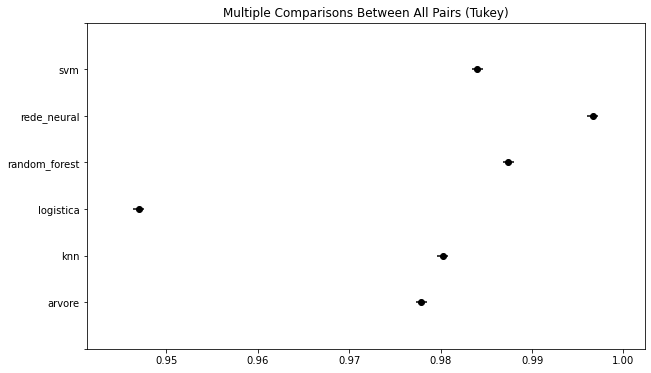

In [77]:
teste_estatistico.plot_simultaneous();

Salvar um classificador já treinado

In [79]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size=10, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

MLPClassifier(batch_size=10)

In [80]:
classificador_random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
classificador_random_forest.fit(X_credit, y_credit)

RandomForestClassifier(criterion='entropy')

In [81]:
classificador_svm = SVC(C=1.5, kernel='rbf', tol=0.001)
classificador_svm.fit(X_credit, y_credit)

SVC(C=1.5)

In [82]:
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_random_forest, open('random_forest_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))